### Exploratory Data Analysis

In [1]:
#imports

import pandas as pd

#visualization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#read in data 

client_date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
client_data = pd.read_csv("../data/raw/client_data.csv", parse_dates = client_date_cols)
price_data = pd.read_csv("../data/raw/price_data.csv", parse_dates = ['price_date'])

In [3]:
pd.set_option('display.max_columns', None)

client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client_data = client_data.astype({"churn" : 'category'})

In [5]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [6]:
#number of rows with missing channel_sales
client_data.loc[client_data['channel_sales'] == "MISSING"].shape

(3725, 26)

In [7]:
#number of rows with missing origin_ups
client_data.loc[client_data['origin_up'] == "MISSING"].shape

(64, 26)

In [8]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000


In [9]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(client_data, minimal = True)
# prof.to_file(output_file = 'client_data_prof.html')

In [10]:
# prof = ProfileReport(price_data)
# prof.to_file(output_file = 'price_data_prof.html')

In [11]:
#check number of companies in client data
nid_price = price_data["id"].nunique()
nid_client = client_data["id"].nunique()

print(f"Note: There is{((nid_price - nid_client) / nid_price): .2%} of clients in the price_data dataset of whom we do not have client data for.")

Note: There is 9.26% of clients in the price_data dataset of whom we do not have client data for.


In [12]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [13]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [14]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [15]:
joined_data = pd.merge(price_data, client_data, on = 'id', how = 'left')
joined_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630.0,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1.0,52.53,3.0,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630.0,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1.0,52.53,3.0,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630.0,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1.0,52.53,3.0,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630.0,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1.0,52.53,3.0,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576.0,0.0,630.0,2013-06-03,2016-06-03,2015-04-29,2015-06-14,531.5,630.0,0.0,19.59,0.14398,0.0,44.311378,f,91.82,21.52,21.52,1.0,52.53,3.0,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [16]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              193002 non-null  object        
 1   price_date                      193002 non-null  datetime64[ns]
 2   price_off_peak_var              193002 non-null  float64       
 3   price_peak_var                  193002 non-null  float64       
 4   price_mid_peak_var              193002 non-null  float64       
 5   price_off_peak_fix              193002 non-null  float64       
 6   price_peak_fix                  193002 non-null  float64       
 7   price_mid_peak_fix              193002 non-null  float64       
 8   channel_sales                   175149 non-null  object        
 9   cons_12m                        175149 non-null  float64       
 10  cons_gas_12m                    175149 non-null  float64

In [17]:
# define columns

TARGET = "churn"
price_cols = list(set(price_data.columns.tolist()) - set(["price_date", "id"]))

In [18]:
price_cols

['price_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_off_peak_var',
 'price_mid_peak_var',
 'price_mid_peak_fix']

### Data Visualization

In [19]:
sns.set_theme(style = "darkgrid")

In [20]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)

####  Target Variable

In [21]:
client_data[TARGET].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [22]:
client_data[TARGET].value_counts(normalize = True)

0    0.902848
1    0.097152
Name: churn, dtype: float64

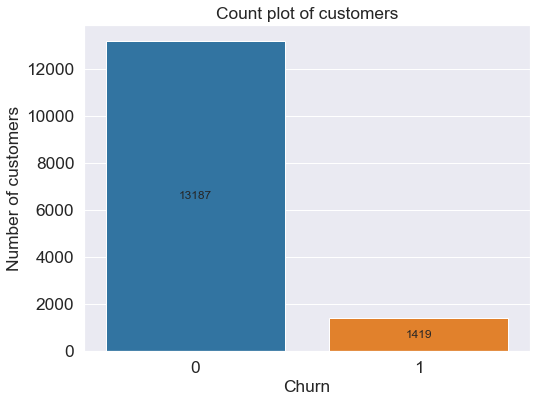

In [23]:
ax = sns.countplot(x = "churn", data = client_data, palette = "tab10")
ax.bar_label(ax.containers[0], label_type = 'center')
plt.title("Count plot of customers")
plt.xlabel("Churn")
plt.ylabel("Number of customers", );

#### Target by categories

In [24]:
client_data.has_gas.value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [25]:
client_data.has_gas.value_counts(normalize = True)

f    0.818499
t    0.181501
Name: has_gas, dtype: float64

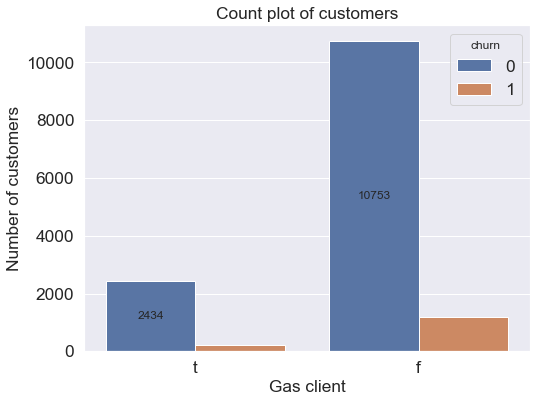

In [26]:
ax = sns.countplot(x = "has_gas", data = client_data, hue = "churn")
ax.bar_label(ax.containers[0], label_type = 'center')
plt.title("Count plot of customers")
plt.xlabel("Gas client")
plt.ylabel("Number of customers");

In [27]:
client_data.groupby("has_gas").churn.value_counts(normalize = True)

has_gas   
f        0    0.899456
         1    0.100544
t        0    0.918144
         1    0.081856
Name: churn, dtype: float64

* We notice a slight different between the churn rates of customers who are also gas clients and customers who are not. 

#### Price and churn

Here, we use data visualization to verify the hypothesis of price sensitivity being to some extent correlated with churn. 

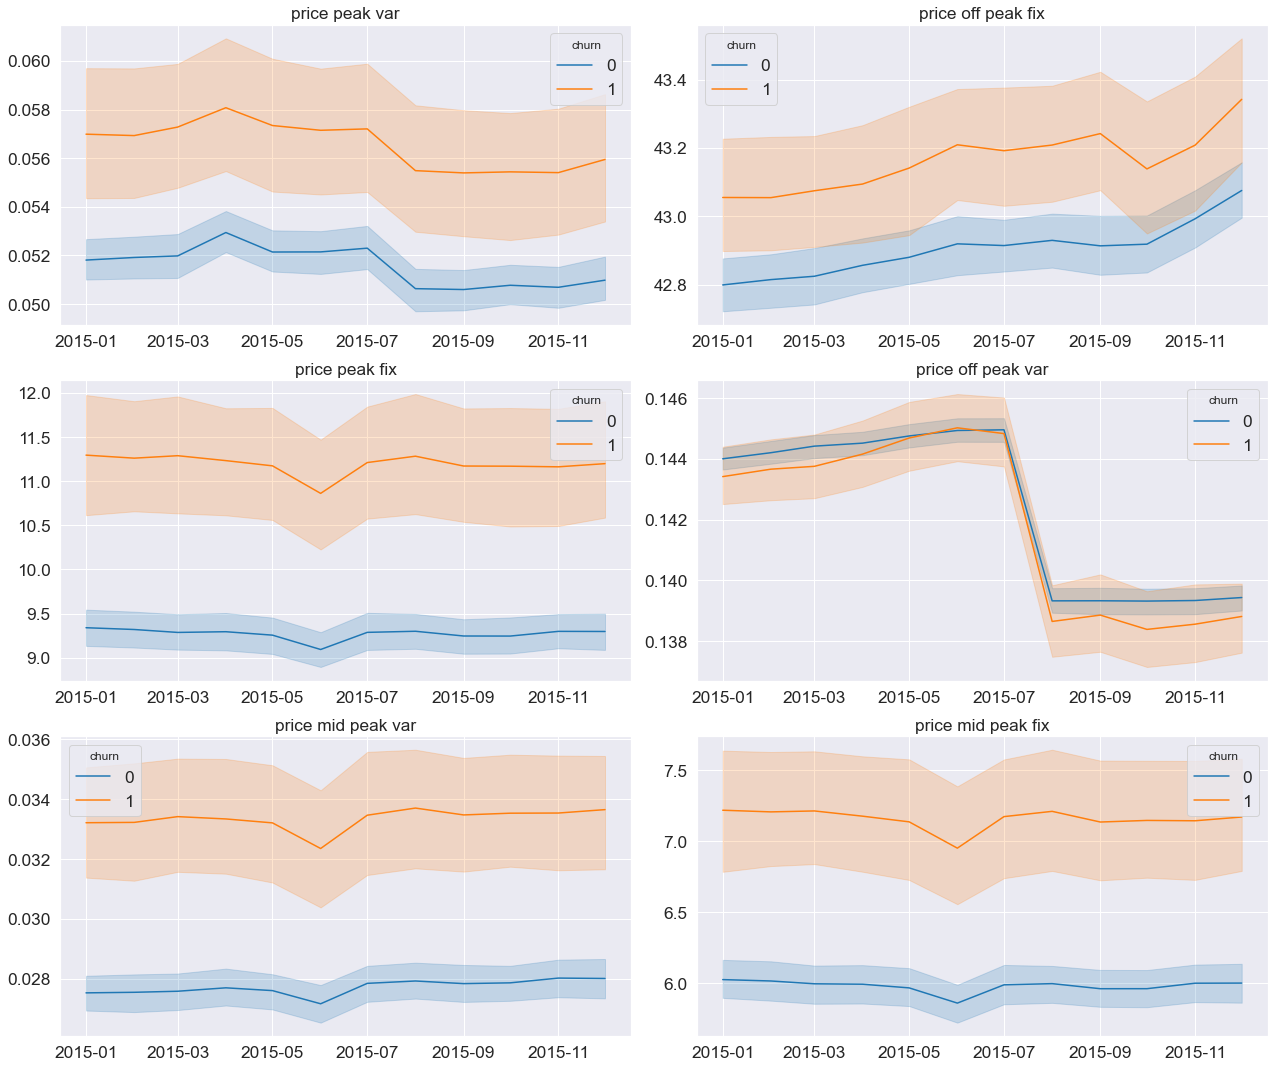

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

axes = axes.ravel()

for col, ax in zip(price_cols, axes):
    
    sns.lineplot(x = 'price_date', 
                 y = col,
                 data = joined_data,
                 hue = 'churn',
                 palette = 'tab10',
                 ax = ax)
    ax.set_title(col.replace("_", " "))
    ax.set_ylabel("")
    ax.set_xlabel("")
                 
plt.tight_layout();

* We see that the customers who churned were charged a higher price in both energy and power for the most part. __price_off_peak_var__ (price of energy for the 1st period (off peak)) is an anomaly and may be something worth exploring in the modeling process. For now, we rely on the trends of most of the prices.